In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import pearsonr
import seaborn as sns
from statistics import mean, stdev


Residual graphs for created models on both Empathetic Concern and Personal Distress

In [4]:
true_emp = [2.667, 5.332999999999999, 2.333, 5.0, 2.0, 5.667000000000001, 6.0, 3.5, 5.832999999999999, 3.5, 1.0, 3.0, 2.333, 3.667, 2.333, 1.0, 4.333, 1.0, 3.0, 4.167, 6.167000000000001, 5.5, 3.667, 1.0, 4.5, 4.0, 6.0, 3.0, 4.333, 3.5, 5.332999999999999, 1.6669999999999998, 6.167000000000001, 6.5, 5.332999999999999, 2.667, 5.167000000000001, 3.167, 1.0, 2.0, 5.832999999999999, 6.167000000000001, 2.333, 6.0, 3.0, 5.332999999999999, 1.167, 5.332999999999999, 2.0, 2.333, 5.0, 7.0, 1.0, 2.333, 6.332999999999999, 7.0, 3.0, 3.667, 5.332999999999999, 6.0, 2.0, 4.167, 3.167, 5.667000000000001, 4.0, 4.333, 5.832999999999999, 3.667, 3.0, 1.167, 2.0, 4.667, 4.667, 1.0, 1.167, 1.0, 3.167, 7.0, 1.6669999999999998, 2.667, 2.333, 4.333, 6.0, 1.3330000000000002, 3.667, 3.833, 1.0, 2.5, 4.5, 2.667, 6.332999999999999, 3.0, 4.333, 4.0, 1.0, 2.667, 3.833, 5.332999999999999, 4.333, 6.5, 5.667000000000001, 3.167, 6.832999999999999, 6.832999999999999, 5.167000000000001, 5.332999999999999, 3.5, 1.0, 3.0, 3.833, 4.0, 1.6669999999999998, 5.167000000000001, 3.5, 3.667, 3.0, 5.5, 1.0, 5.832999999999999, 6.832999999999999, 6.332999999999999, 3.5, 1.0, 2.667, 3.167, 4.167, 1.167, 6.5, 2.167, 4.167, 2.0, 1.0, 6.0, 5.832999999999999, 3.167, 3.333, 4.5, 4.667, 4.333, 4.0, 3.167, 1.0, 1.0, 4.167, 3.833, 4.333, 4.0, 6.0, 2.333, 5.332999999999999, 2.5, 1.0, 2.667, 7.0, 7.0, 1.0, 2.333, 4.333, 1.167, 6.0, 2.833, 3.667, 3.0, 6.832999999999999, 6.5, 6.667000000000001, 7.0, 3.833, 1.0, 2.333, 2.0, 4.167, 1.0, 1.0, 4.167, 1.0, 5.0, 6.0, 4.667, 7.0, 5.332999999999999, 4.167, 7.0, 4.0, 1.6669999999999998, 4.0]
predicted_emp = [3.7423315048217773, 3.457198143005371, 3.742145538330078, 4.696371555328369, 2.0761613845825195, 4.527929306030273, 5.014266014099121, 4.548680782318115, 5.2409796714782715, 3.7859861850738525, 1.9267061948776245, 4.1286845207214355, 2.7388460636138916, 3.6943142414093018, 2.3412437438964844, 4.106888771057129, 5.299252986907959, 1.410213828086853, 2.0387203693389893, 4.412542819976807, 4.924091339111328, 3.2265217304229736, 2.531794309616089, 2.669196605682373, 5.104273796081543, 3.779062271118164, 5.197587013244629, 3.672013282775879, 4.9365668296813965, 2.9866902828216553, 4.3739752769470215, 4.250487804412842, 5.147480487823486, 2.4505035877227783, 2.096863269805908, 4.5016326904296875, 4.365622520446777, 5.215374946594238, 2.0923376083374023, 1.384728193283081, 5.044833183288574, 4.580771446228027, 2.7379047870635986, 1.8655918836593628, 5.107685565948486, 4.726540565490723, 3.0434679985046387, 5.0251898765563965, 5.184812545776367, 4.076218605041504, 5.006675720214844, 3.865854263305664, 2.63934063911438, 3.481098175048828, 4.701502799987793, 3.8479509353637695, 2.6498160362243652, 2.9120185375213623, 5.018621444702148, 4.805090427398682, 1.9658204317092896, 5.08363151550293, 5.077221870422363, 3.998687982559204, 2.6128087043762207, 5.110842227935791, 4.943218231201172, 4.6128644943237305, 3.358471155166626, 1.8225306272506714, 1.9182260036468506, 5.038049697875977, 1.7858829498291016, 2.282294511795044, 3.6901495456695557, 1.8690844774246216, 4.9617509841918945, 5.16839599609375, 2.8044066429138184, 3.7279856204986572, 1.8052599430084229, 4.554300785064697, 4.441610813140869, 1.9717143774032593, 2.5362331867218018, 5.2423624992370605, 3.710808277130127, 1.874516248703003, 2.226433515548706, 5.133717060089111, 5.218197822570801, 5.165815353393555, 4.919451713562012, 3.735267162322998, 4.085205554962158, 2.1415209770202637, 2.2557811737060547, 2.2084455490112305, 5.09903621673584, 5.20112943649292, 4.5792317390441895, 4.826586723327637, 3.605179786682129, 2.266638994216919, 4.9860310554504395, 2.347296714782715, 2.4199790954589844, 2.203535556793213, 5.265558242797852, 5.28834342956543, 4.027430534362793, 2.829197645187378, 3.6980414390563965, 2.8474042415618896, 2.3802671432495117, 1.884788155555725, 3.4019594192504883, 1.9715322256088257, 4.975205898284912, 5.053433895111084, 5.241420745849609, 5.052505016326904, 2.4517784118652344, 5.096612930297852, 3.164734363555908, 3.9804842472076416, 4.8340935707092285, 4.488103866577148, 3.010934352874756, 2.701890468597412, 5.1444549560546875, 1.7922786474227905, 3.4261837005615234, 5.003959655761719, 4.9639573097229, 3.944899559020996, 4.823256015777588, 4.500890254974365, 2.0795979499816895, 4.1632866859436035, 2.628495216369629, 3.2326691150665283, 1.9363746643066406, 3.1604321002960205, 2.574251413345337, 2.519381046295166, 3.599348545074463, 5.098205089569092, 2.3832409381866455, 4.755260467529297, 3.15621018409729, 1.985592007637024, 2.1719067096710205, 4.25219202041626, 2.0898237228393555, 3.181148052215576, 4.4603376388549805, 4.015650272369385, 4.980105400085449, 5.239770889282227, 5.072226047515869, 3.980095624923706, 3.8420066833496094, 4.167004585266113, 2.3648838996887207, 3.6040401458740234, 4.833160877227783, 3.2415313720703125, 3.850130796432495, 3.1639418601989746, 3.3268399238586426, 4.521083354949951, 3.0392866134643555, 2.22005295753479, 3.9487102031707764, 2.4101409912109375, 3.948396682739258, 3.6461665630340576, 4.295111179351807, 4.3249006271362305, 3.862001895904541, 3.419114112854004, 3.031881332397461, 4.182300567626953, 3.8352766036987305, 3.066749334335327]
true_dis = [1.5, 4.75, 1.875, 4.875, 3.375, 2.25, 6.0, 3.75, 3.625, 3.5, 1.0, 6.5, 2.875, 2.75, 1.0, 3.375, 3.75, 1.875, 1.0, 4.25, 6.0, 6.0, 3.875, 3.625, 4.125, 4.25, 4.25, 2.625, 5.0, 1.625, 6.25, 1.25, 5.5, 2.25, 5.75, 3.125, 4.75, 5.75, 1.0, 1.125, 6.75, 6.0, 3.25, 1.0, 3.375, 1.625, 4.0, 1.75, 5.5, 3.625, 4.5, 7.0, 2.875, 2.375, 6.0, 7.0, 1.5, 5.375, 5.75, 5.5, 3.875, 3.375, 4.0, 6.125, 3.625, 2.25, 5.75, 4.0, 5.5, 1.75, 2.875, 6.0, 4.375, 2.5, 1.0, 1.0, 5.25, 1.0, 1.0, 1.0, 1.0, 2.0, 6.375, 1.0, 4.625, 3.875, 3.875, 2.5, 4.25, 6.0, 3.5, 7.0, 3.625, 4.0, 1.0, 1.0, 3.375, 6.125, 3.25, 4.875, 5.0, 4.75, 3.5, 6.375, 5.0, 4.625, 1.125, 1.0, 6.0, 5.0, 4.0, 1.875, 1.5, 1.875, 4.625, 5.75, 7.0, 1.0, 4.625, 6.75, 1.875, 3.25, 3.5, 4.75, 4.25, 4.625, 1.25, 5.625, 3.375, 3.875, 5.0, 1.0, 6.0, 5.875, 1.5, 6.125, 4.625, 5.75, 5.5, 4.0, 3.125, 7.0, 1.0, 4.75, 4.375, 5.125, 4.625, 2.25, 4.75, 4.0, 3.0, 1.375, 2.625, 5.5, 1.0, 1.0, 3.0, 3.5, 1.125, 6.0, 7.0, 6.625, 6.25, 7.0, 3.75, 6.625, 2.5, 5.875, 6.125, 1.125, 1.625, 6.25, 1.0, 1.0, 3.625, 1.25, 5.625, 3.0, 6.875, 7.0, 2.75, 5.0, 1.0, 1.0, 1.75, 3.875]
predicted_dis = [4.1854352951049805, 5.129281997680664, 2.8714842796325684, 5.6381516456604, 2.388974189758301, 2.6916699409484863, 5.668525218963623, 4.3952507972717285, 5.099762916564941, 4.256743907928467, 3.409221649169922, 4.8777666091918945, 2.1319141387939453, 4.282891273498535, 1.1254444122314453, 4.619792938232422, 4.261985778808594, 1.505328893661499, 3.7952847480773926, 4.036516189575195, 4.614954948425293, 4.117866039276123, 3.407989740371704, 3.4170286655426025, 5.389095783233643, 4.128286838531494, 4.231740951538086, 4.266000747680664, 5.208874225616455, 1.6790848970413208, 5.903905868530273, 2.699443817138672, 5.685508728027344, 3.145071506500244, 3.1899242401123047, 5.809341907501221, 5.715038299560547, 5.143746852874756, 1.5402157306671143, 1.1001766920089722, 5.6108856201171875, 4.818749904632568, 2.903106927871704, 1.215043306350708, 5.282895088195801, 2.8544981479644775, 2.0364863872528076, 2.9146547317504883, 4.721050262451172, 4.774470806121826, 3.1628708839416504, 3.693941831588745, 3.321364402770996, 4.147150993347168, 3.730403184890747, 3.0547001361846924, 1.809929370880127, 3.828735113143921, 5.521077632904053, 5.877082824707031, 1.3365734815597534, 2.0420327186584473, 5.125412940979004, 4.69482946395874, 1.606034755706787, 2.702394962310791, 3.6421306133270264, 4.813629627227783, 3.755988597869873, 1.0599943399429321, 1.8500702381134033, 4.607698440551758, 2.7804770469665527, 4.752807140350342, 2.3281466960906982, 2.2038497924804688, 5.682214260101318, 4.115540027618408, 2.4734246730804443, 1.3209501504898071, 1.4650081396102905, 2.878187417984009, 3.925217628479004, 3.8126046657562256, 3.3525261878967285, 4.210171699523926, 4.937711238861084, 1.4000881910324097, 2.2930243015289307, 4.683874130249023, 3.841526985168457, 3.806429624557495, 5.813663005828857, 3.176276922225952, 4.147123336791992, 1.7667574882507324, 1.7676199674606323, 5.683310031890869, 4.3053412437438965, 3.3994224071502686, 4.639564514160156, 5.311380863189697, 2.6922285556793213, 4.885941028594971, 4.934267997741699, 2.935418128967285, 2.55180025100708, 2.8555428981781006, 5.826374053955078, 5.658858776092529, 3.9983437061309814, 4.248612403869629, 1.637068510055542, 1.7569844722747803, 2.6339950561523438, 2.6481027603149414, 3.3439242839813232, 3.6216940879821777, 5.802985191345215, 5.9030680656433105, 4.872424602508545, 2.796262741088867, 5.45407247543335, 4.629096031188965, 2.832437515258789, 3.867142915725708, 4.1476826667785645, 4.361506462097168, 3.4634294509887695, 1.8030509948730469, 3.9506077766418457, 3.022156000137329, 5.860741138458252, 5.794950485229492, 2.9818408489227295, 3.6131649017333984, 3.3414177894592285, 3.8496108055114746, 4.604261875152588, 3.6157660484313965, 3.3212339878082275, 3.295433282852173, 2.583413600921631, 4.385380744934082, 2.6355605125427246, 4.357138156890869, 5.517271518707275, 2.7271573543548584, 2.536903142929077, 5.7359209060668945, 2.925536632537842, 1.6475368738174438, 2.8162567615509033, 4.321508407592773, 2.038482189178467, 2.0934901237487793, 4.360114574432373, 1.807735562324524, 4.818655967712402, 3.8610239028930664, 5.885668754577637, 5.3145432472229, 3.81295108795166, 5.029284954071045, 2.1183669567108154, 3.6196043491363525, 2.576594591140747, 5.868159770965576, 5.87189245223999, 2.1153275966644287, 5.205377578735352, 5.243459701538086, 1.728879451751709, 2.7425119876861572, 2.427680253982544, 3.299579381942749, 2.7320520877838135, 2.42529034614563, 2.4555153846740723, 5.398810386657715, 4.404056072235107, 2.514848232269287, 3.8542048931121826, 2.6196274757385254, 2.6190614700317383, 2.355834484100342]

(-3.0, 3.0)

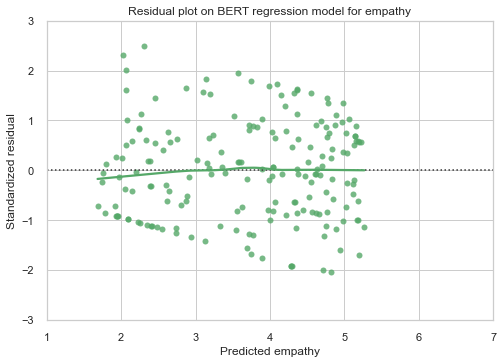

In [36]:
sns.set_theme(style="whitegrid")

res = [a_i - b_i for a_i, b_i in zip(true_emp, predicted_emp)]
m =mean(res)
st = stdev(res)
res_st = [(x - m)/st for x in res]

# Plot the residuals after fitting a linear model
sns.residplot(x=predicted_emp, y=res_st, lowess=True, color="g")
plt.title('Residual plot on BERT regression model for empathy')
# Set x-axis label
plt.xlabel('Predicted empathy')
# Set y-axis label
plt.ylabel('Standardized residual')

plt.xlim([1, 7])
plt.ylim([-3, 3])


(-3.0, 3.0)

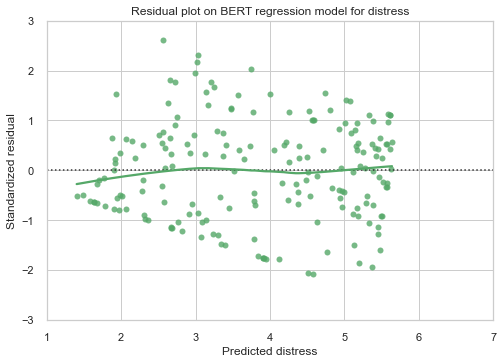

In [37]:
sns.set_theme(style="whitegrid")

res = [a_i - b_i for a_i, b_i in zip(true_dis, predicted_dis)]
m =mean(res)
st = stdev(res)
res_st = [(x - m)/st for x in res]
# Plot the residuals after fitting a linear model
sns.residplot(x=predicted_dis, y=res_st, lowess=True, color="g")
plt.title('Residual plot on BERT regression model for distress')
# Set x-axis label
plt.xlabel('Predicted distress')
# Set y-axis label
plt.ylabel('Standardized residual')
plt.xlim([1, 7])
plt.ylim([-3, 3])

ROBERTA

In [38]:
true_emp = [2.667, 5.332999999999999, 2.333, 5.0, 2.0, 5.667000000000001, 6.0, 3.5, 5.832999999999999, 3.5, 1.0, 3.0, 2.333, 3.667, 2.333, 1.0, 4.333, 1.0, 3.0, 4.167, 6.167000000000001, 5.5, 3.667, 1.0, 4.5, 4.0, 6.0, 3.0, 4.333, 3.5, 5.332999999999999, 1.6669999999999998, 6.167000000000001, 6.5, 5.332999999999999, 2.667, 5.167000000000001, 3.167, 1.0, 2.0, 5.832999999999999, 6.167000000000001, 2.333, 6.0, 3.0, 5.332999999999999, 1.167, 5.332999999999999, 2.0, 2.333, 5.0, 7.0, 1.0, 2.333, 6.332999999999999, 7.0, 3.0, 3.667, 5.332999999999999, 6.0, 2.0, 4.167, 3.167, 5.667000000000001, 4.0, 4.333, 5.832999999999999, 3.667, 3.0, 1.167, 2.0, 4.667, 4.667, 1.0, 1.167, 1.0, 3.167, 7.0, 1.6669999999999998, 2.667, 2.333, 4.333, 6.0, 1.3330000000000002, 3.667, 3.833, 1.0, 2.5, 4.5, 2.667, 6.332999999999999, 3.0, 4.333, 4.0, 1.0, 2.667, 3.833, 5.332999999999999, 4.333, 6.5, 5.667000000000001, 3.167, 6.832999999999999, 6.832999999999999, 5.167000000000001, 5.332999999999999, 3.5, 1.0, 3.0, 3.833, 4.0, 1.6669999999999998, 5.167000000000001, 3.5, 3.667, 3.0, 5.5, 1.0, 5.832999999999999, 6.832999999999999, 6.332999999999999, 3.5, 1.0, 2.667, 3.167, 4.167, 1.167, 6.5, 2.167, 4.167, 2.0, 1.0, 6.0, 5.832999999999999, 3.167, 3.333, 4.5, 4.667, 4.333, 4.0, 3.167, 1.0, 1.0, 4.167, 3.833, 4.333, 4.0, 6.0, 2.333, 5.332999999999999, 2.5, 1.0, 2.667, 7.0, 7.0, 1.0, 2.333, 4.333, 1.167, 6.0, 2.833, 3.667, 3.0, 6.832999999999999, 6.5, 6.667000000000001, 7.0, 3.833, 1.0, 2.333, 2.0, 4.167, 1.0, 1.0, 4.167, 1.0, 5.0, 6.0, 4.667, 7.0, 5.332999999999999, 4.167, 7.0, 4.0, 1.6669999999999998, 4.0]
predicted_emp = [4.2136640548706055, 3.775989055633545, 4.357046127319336, 4.698172569274902, 2.0500059127807617, 3.891906499862671, 4.6235175132751465, 4.520040035247803, 5.230362415313721, 3.6985023021698, 1.9625694751739502, 4.4508891105651855, 2.38429856300354, 3.3582632541656494, 2.884028196334839, 3.9000799655914307, 5.031682968139648, 1.7823432683944702, 2.0102293491363525, 4.469085693359375, 4.684493541717529, 4.221925735473633, 2.141953706741333, 3.1238036155700684, 5.126016616821289, 3.899304151535034, 5.148451805114746, 4.062438488006592, 4.613974571228027, 2.070368528366089, 4.372244358062744, 3.716207504272461, 4.880749225616455, 2.0260322093963623, 2.0694243907928467, 3.972379684448242, 4.069814205169678, 5.171830177307129, 2.251295328140259, 1.746812343597412, 5.197239875793457, 4.362837791442871, 2.4019672870635986, 2.059199094772339, 4.6621294021606445, 3.823409080505371, 3.6928043365478516, 4.979599475860596, 5.1923956871032715, 4.732366561889648, 4.819437503814697, 4.091832160949707, 2.7322428226470947, 3.555236339569092, 4.207699298858643, 3.5661730766296387, 2.9128801822662354, 3.015702247619629, 5.042795181274414, 4.750568389892578, 2.6122076511383057, 2.7550346851348877, 4.769231796264648, 4.762618541717529, 2.655287981033325, 4.364277362823486, 5.157508373260498, 4.854506492614746, 4.566781997680664, 1.6837706565856934, 2.1464645862579346, 4.5136823654174805, 2.2721121311187744, 2.3984200954437256, 2.7340247631073, 2.086843967437744, 5.1800713539123535, 4.98568868637085, 3.545649528503418, 4.042470455169678, 1.7539918422698975, 4.60729455947876, 3.1885032653808594, 1.923458218574524, 2.5685312747955322, 4.751591682434082, 4.296053886413574, 2.597598075866699, 3.1784746646881104, 4.892205715179443, 4.962989330291748, 4.988718509674072, 5.11101770401001, 4.161951541900635, 4.282129287719727, 2.2015938758850098, 2.3304262161254883, 3.721365213394165, 4.838929653167725, 5.061891078948975, 5.12629508972168, 4.318722248077393, 3.98842453956604, 3.7448320388793945, 4.533016204833984, 2.4551565647125244, 3.398954153060913, 2.410712242126465, 5.2686991691589355, 5.179531097412109, 4.548738956451416, 3.3239052295684814, 3.7147881984710693, 3.1785833835601807, 3.1507763862609863, 1.9320279359817505, 3.5156729221343994, 1.9404710531234741, 5.184835910797119, 4.785839557647705, 5.156565189361572, 5.019234657287598, 2.941847562789917, 4.753748416900635, 2.3909366130828857, 4.04300594329834, 4.719696044921875, 4.888822555541992, 2.867375373840332, 2.238339900970459, 4.938699245452881, 1.945414423942566, 3.099487543106079, 4.800550937652588, 4.332274913787842, 3.2063634395599365, 4.6372504234313965, 4.6978983879089355, 2.0784695148468018, 5.110594272613525, 2.357954740524292, 3.7485475540161133, 2.481919288635254, 3.3462986946105957, 2.4606945514678955, 2.63204026222229, 3.612337827682495, 5.019958019256592, 1.9695472717285156, 4.828413963317871, 3.621731758117676, 1.9261529445648193, 1.7981120347976685, 4.552097797393799, 2.308897018432617, 2.353566884994507, 4.001672744750977, 4.678793430328369, 4.822755813598633, 5.145491123199463, 4.368105411529541, 3.9905662536621094, 4.615411281585693, 4.317527770996094, 3.1466240882873535, 4.150284290313721, 4.363697528839111, 4.0257744789123535, 4.282312870025635, 2.6438398361206055, 2.8107807636260986, 4.372745990753174, 2.543905019760132, 2.0933101177215576, 4.048076152801514, 2.23352313041687, 4.294690132141113, 2.8750908374786377, 3.2375547885894775, 4.762038230895996, 4.026598930358887, 2.2450110912323, 4.366156101226807, 3.5707225799560547, 3.778569221496582, 3.5882787704467773]
true_dis = [1.5, 4.75, 1.875, 4.875, 3.375, 2.25, 6.0, 3.75, 3.625, 3.5, 1.0, 6.5, 2.875, 2.75, 1.0, 3.375, 3.75, 1.875, 1.0, 4.25, 6.0, 6.0, 3.875, 3.625, 4.125, 4.25, 4.25, 2.625, 5.0, 1.625, 6.25, 1.25, 5.5, 2.25, 5.75, 3.125, 4.75, 5.75, 1.0, 1.125, 6.75, 6.0, 3.25, 1.0, 3.375, 1.625, 4.0, 1.75, 5.5, 3.625, 4.5, 7.0, 2.875, 2.375, 6.0, 7.0, 1.5, 5.375, 5.75, 5.5, 3.875, 3.375, 4.0, 6.125, 3.625, 2.25, 5.75, 4.0, 5.5, 1.75, 2.875, 6.0, 4.375, 2.5, 1.0, 1.0, 5.25, 1.0, 1.0, 1.0, 1.0, 2.0, 6.375, 1.0, 4.625, 3.875, 3.875, 2.5, 4.25, 6.0, 3.5, 7.0, 3.625, 4.0, 1.0, 1.0, 3.375, 6.125, 3.25, 4.875, 5.0, 4.75, 3.5, 6.375, 5.0, 4.625, 1.125, 1.0, 6.0, 5.0, 4.0, 1.875, 1.5, 1.875, 4.625, 5.75, 7.0, 1.0, 4.625, 6.75, 1.875, 3.25, 3.5, 4.75, 4.25, 4.625, 1.25, 5.625, 3.375, 3.875, 5.0, 1.0, 6.0, 5.875, 1.5, 6.125, 4.625, 5.75, 5.5, 4.0, 3.125, 7.0, 1.0, 4.75, 4.375, 5.125, 4.625, 2.25, 4.75, 4.0, 3.0, 1.375, 2.625, 5.5, 1.0, 1.0, 3.0, 3.5, 1.125, 6.0, 7.0, 6.625, 6.25, 7.0, 3.75, 6.625, 2.5, 5.875, 6.125, 1.125, 1.625, 6.25, 1.0, 1.0, 3.625, 1.25, 5.625, 3.0, 6.875, 7.0, 2.75, 5.0, 1.0, 1.0, 1.75, 3.875]
predicted_dis = [3.784360408782959, 5.580221176147461, 4.76516580581665, 5.46809196472168, 2.1478703022003174, 3.4515628814697266, 4.582103252410889, 4.347279071807861, 5.166820526123047, 4.539513111114502, 3.4028351306915283, 4.810651779174805, 2.190622568130493, 3.7885334491729736, 1.641937017440796, 5.188413619995117, 4.937680244445801, 1.7764674425125122, 3.340197801589966, 3.5907809734344482, 4.591786861419678, 3.5727899074554443, 3.36993408203125, 4.167891502380371, 5.30217170715332, 4.509374618530273, 4.636977195739746, 3.7977383136749268, 4.219101428985596, 1.6714483499526978, 5.0071187019348145, 2.760430335998535, 5.509661674499512, 1.9051868915557861, 2.719513177871704, 4.241100788116455, 4.949002265930176, 5.447507381439209, 1.6332175731658936, 1.4879510402679443, 5.3316497802734375, 4.254967212677002, 1.8738865852355957, 1.5804425477981567, 5.111722946166992, 3.142232656478882, 2.563911199569702, 2.5706892013549805, 5.256877899169922, 5.5133185386657715, 3.7346084117889404, 5.028258323669434, 2.596301794052124, 5.126949787139893, 3.2451391220092773, 3.7505545616149902, 2.0091381072998047, 3.1733617782592773, 5.41816520690918, 5.419712066650391, 2.5152697563171387, 2.293058156967163, 4.994080066680908, 5.150251388549805, 2.5460991859436035, 2.289292573928833, 5.178940773010254, 4.489504814147949, 3.4781055450439453, 1.6987196207046509, 1.9836606979370117, 5.0941362380981445, 4.255945682525635, 5.484933853149414, 2.823853015899658, 2.3182668685913086, 5.628217697143555, 3.9120497703552246, 3.908885955810547, 1.4027931690216064, 1.9094207286834717, 2.958773136138916, 4.007704257965088, 1.9718990325927734, 4.385641098022461, 5.2977375984191895, 5.3831257820129395, 1.916448712348938, 2.9842569828033447, 4.927947044372559, 4.374337673187256, 5.620378017425537, 5.499677658081055, 3.6471197605133057, 4.517815589904785, 1.6826534271240234, 2.0636584758758545, 5.481844902038574, 5.330278396606445, 4.1873602867126465, 5.281280517578125, 5.519314765930176, 2.585139274597168, 5.173501491546631, 5.207848072052002, 2.7458717823028564, 2.0601024627685547, 3.072941541671753, 5.570590496063232, 5.38831901550293, 4.8290863037109375, 5.376282215118408, 1.9873756170272827, 2.2824220657348633, 3.3715081214904785, 2.654228687286377, 4.740940570831299, 3.942225217819214, 5.577011585235596, 5.593741416931152, 5.198245048522949, 5.458958148956299, 4.967512607574463, 4.494157314300537, 3.4128737449645996, 3.2897915840148926, 3.301788330078125, 5.153193473815918, 2.671854257583618, 2.88800048828125, 4.39149808883667, 2.6684656143188477, 5.5664472579956055, 5.377693176269531, 3.08213472366333, 3.2076988220214844, 4.055480480194092, 3.1385133266448975, 3.482464551925659, 4.927683353424072, 4.373380661010742, 2.5590474605560303, 2.3558053970336914, 5.122603893280029, 2.7232742309570312, 4.710062026977539, 5.5670485496521, 2.5514166355133057, 1.9336434602737427, 4.969763278961182, 3.791585683822632, 1.9456008672714233, 1.9240856170654297, 5.163990020751953, 2.673891544342041, 3.9167869091033936, 5.457231521606445, 3.514824867248535, 4.125975608825684, 4.563397407531738, 5.609271049499512, 5.385782241821289, 2.99721360206604, 5.078059196472168, 3.127239942550659, 3.022233009338379, 3.325817346572876, 5.618869304656982, 5.641555309295654, 2.306091547012329, 2.915508508682251, 4.527390956878662, 1.778272032737732, 4.576381683349609, 2.9226698875427246, 3.237946033477783, 3.7777106761932373, 2.688133955001831, 3.038348913192749, 5.590230941772461, 4.636709690093994, 2.6305525302886963, 3.8462936878204346, 2.690635919570923, 3.038978099822998, 2.6517465114593506]

(-3.0, 3.0)

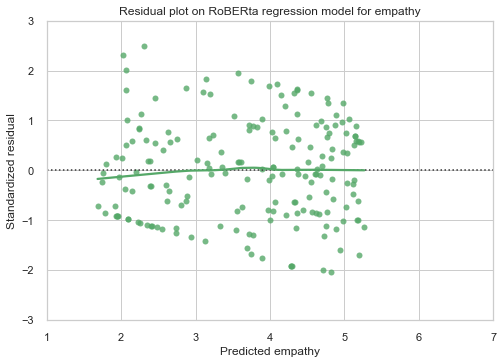

In [39]:
sns.set_theme(style="whitegrid")

res = [a_i - b_i for a_i, b_i in zip(true_emp, predicted_emp)]

m =mean(res)
st = stdev(res)
res_st = [(x - m)/st for x in res]

# Plot the residuals after fitting a linear model
sns.residplot(x=predicted_emp, y=res_st, lowess=True, color="g")
plt.title('Residual plot on RoBERta regression model for empathy')
# Set x-axis label
plt.xlabel('Predicted empathy')
# Set y-axis label
plt.ylabel('Standardized residual')
plt.xlim([1, 7])
plt.ylim([-3, 3])

(-3.0, 3.0)

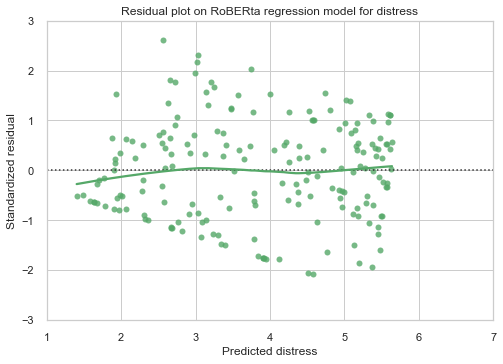

In [40]:
sns.set_theme(style="whitegrid")

res = [a_i - b_i for a_i, b_i in zip(true_dis, predicted_dis)]

m =mean(res)
st = stdev(res)
res_st = [(x - m)/st for x in res]
# Plot the residuals after fitting a linear model
sns.residplot(x=predicted_dis, y=res_st, lowess=True, color="g")
plt.title('Residual plot on RoBERta regression model for distress')
# Set x-axis label
plt.xlabel('Predicted distress')
# Set y-axis label
plt.ylabel('Standardized residual')
plt.xlim([1, 7])
plt.ylim([-3, 3])